## Free fall under gravity

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as amt
from IPython.display import HTML

In [8]:
a, b, c, x, y = [], [], [], [], []

H = 25					# meter
m = 5					# Kg
g = 9.81				# m/(s**2)

PE_max = m*g*H
T = np.sqrt((2*H)/g)

t = np.linspace(0, T, 250, endpoint=False)
h = (0.5*g*(t**2))
v = np.sqrt(2*g*h)
v_max = max(v)

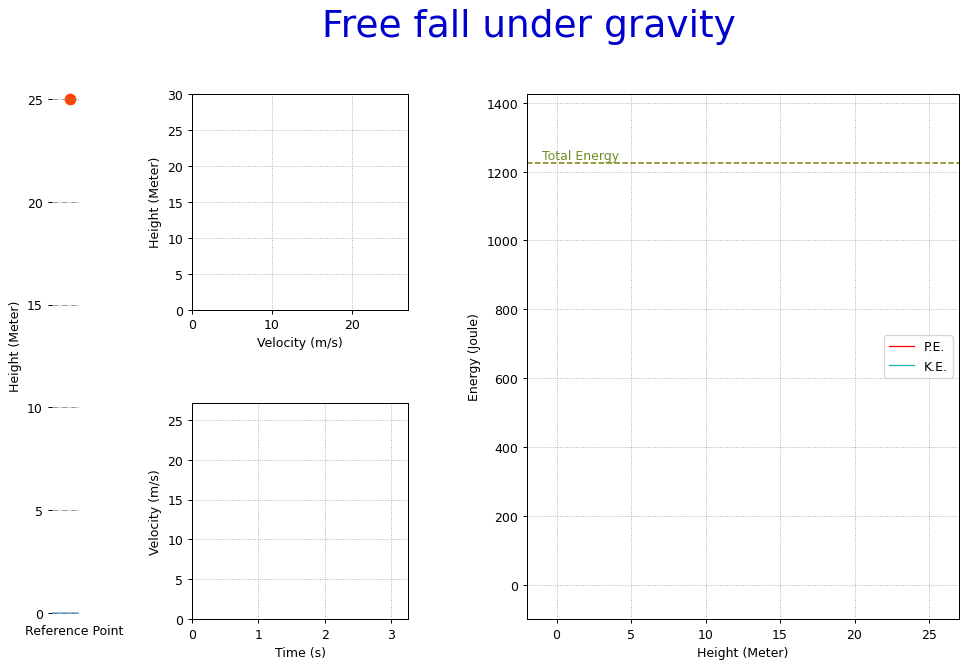

In [12]:
fig = plt.figure(figsize=[12, 8], dpi=90)
fig.text(0.35, 0.93, 'Free fall under gravity', color='mediumblue', fontsize=30)
ax1 = plt.axes([0.1, 0.1, 0.025, 0.8])
ax2 = plt.axes([0.23, 0.55, 0.2, 0.3])
ax3 = plt.axes([0.23, 0.12, 0.2, 0.3])
ax4 = plt.axes([0.54, 0.12, 0.4, 0.73])

ax1_P = ax1.scatter(0, H, color='orangered', s=70)
ax1.set_xlim(-2, 1)
ax1.set_ylim(-1, H+2)
ax1.set_ylabel('Height (Meter)')
ax1.axhline(y=0, alpha=0.5)
ax1.text(-5, -1, 'Reference Point')
ax1.xaxis.set_visible(False)
ax1.set_frame_on(False)
ax1.grid(color='grey', alpha=0.9, lw=0.7, ls='-.')

ax2_VH, = ax2.plot(0, 0, color='orchid', lw=1)
ax2.set_xlabel('Velocity (m/s)')
ax2.set_ylabel('Height (Meter)')
ax2.set_xlim(0, v_max+5)
ax2.set_ylim(0, H+5)
ax2.grid(color='grey', alpha=0.7, lw=0.7, ls=':')

ax3_TV, = ax3.plot(0, 0, color='green', lw=1)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Velocity (m/s)')
ax3.set_xlim(0, T+1)
ax3.set_ylim(0, v_max+5)
ax3.grid(color='grey', alpha=0.7, lw=0.7, ls=':')

ax4_PE, = ax4.plot(0, 0, color='red', label='P.E.', lw=1)
ax4_KE, = ax4.plot(0, 0, color='lightseagreen', label='K.E.', lw=1)
ax4.set_xlabel('Height (Meter)')
ax4.set_ylabel('Energy (Joule)')
ax4.set_xlim(-2, H+2)
ax4.set_ylim([-100, PE_max+200])
ax4.axhline(y=PE_max, color='olive', ls='--', lw=1.2)
ax4.text(-1, PE_max+10, 'Total Energy', color='olivedrab')
ax4.grid(color='grey', alpha=0.7, lw=0.7, ls=':')
ax4.legend(loc=5)

#plt.close()

In [11]:
def animation_plots(i):
    a.append(t[i])
    b.append(H-h[i])
    c.append(v[i])
    x.append(m*g*h[i])
    y.append(m*g*(H-h[i]))
    ax1_P.set_offsets((0, H-h[i]))
    ax2_VH.set_data(c, b)
    ax3_TV.set_data(a, c)
    ax4_PE.set_data(b, y)
    ax4_KE.set_data(b, x)
    return ax1_P, ax2_VH,ax3_TV,ax4_PE, ax4_KE,

anim = amt.FuncAnimation(fig, animation_plots, frames=len(t)-1, interval=60)

HTML(anim.to_html5_video())